In [1]:
import os
from tensorflow import keras
from keras import layers

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Let's first take a look at the data

Minimum age 15.0
Maximum age 90.0


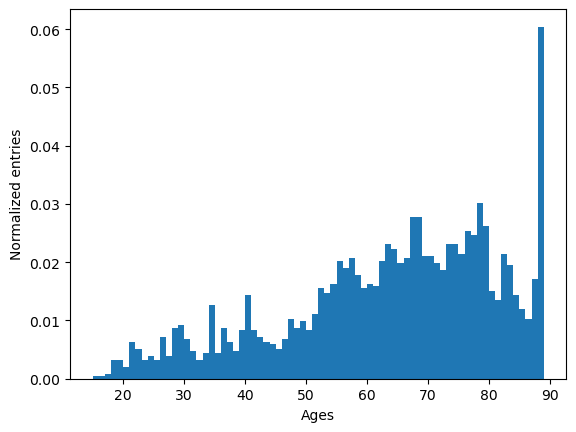

In [2]:
ages = np.load("eICU_age.npy").astype(float)
#Let's normalize the ages between 0 and 1
min_age = np.min(ages)
max_age = np.max(ages)
bins = np.arange(min_age,max_age,1)
plt.hist(ages,bins=bins, density = True)
plt.xlabel("Ages")
plt.ylabel("Normalized entries")
print("Minimum age {}".format(min_age))
print("Maximum age {}".format(max_age))
ages = (ages-min_age)/(max_age-min_age)

# Let's create the generator and discriminator models

In [3]:
generator = get_generator(num_inputs = 1)
discriminator = get_discriminator(num_inputs = 1)

In [4]:
model = GAN(discriminator, generator)
model.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    g_optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss_fn=keras.losses.BinaryCrossentropy(),
)
epochs = 3000
history = model.fit(
    ages[:,None], 
    batch_size = 128,
    epochs=epochs,
    verbose=0,
)

Text(0, 0.5, 'Loss function')

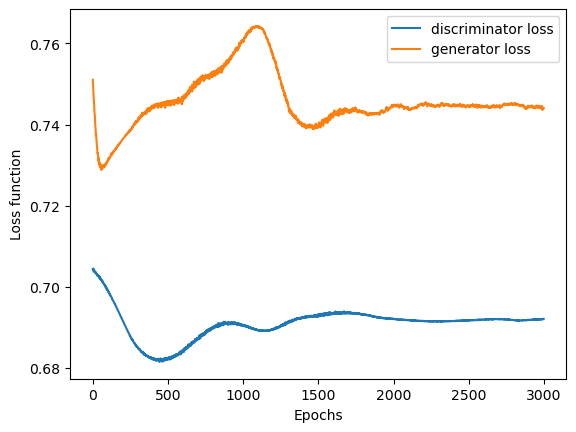

In [5]:
plt.plot(history.history['discriminator loss'],label="discriminator loss")
plt.plot(history.history['generator loss'],label = 'generator loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss function")

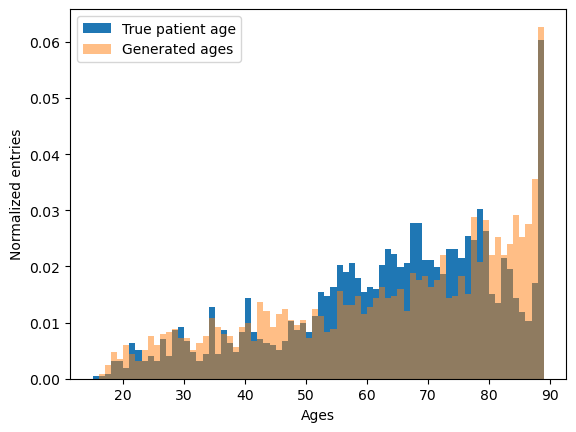

In [6]:
generated = model.generate(ages.shape[0]).numpy()
#Undo the preprocessing
generated = (max_age-min_age)*generated + min_age
generated = np.clip(np.round(generated),min_age,max_age)
ages = (max_age-min_age)*ages + min_age
plt.hist(ages,bins=bins, density = True,label= "True patient age")
plt.hist(generated,alpha=0.5,bins=bins, density = True, label = "Generated ages")
plt.xlabel("Ages")
plt.ylabel("Normalized entries")
plt.legend()